In [1]:
import os
import pandas as pd

In [2]:
wines = pd.read_csv("winequalityN.csv")
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
wines.drop(index=0,axis=1,inplace=True)

In [7]:
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [8]:
wines.info()
wines.describe()
wines.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6496 entries, 1 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6496 non-null   object 
 1   fixed acidity         6486 non-null   float64
 2   volatile acidity      6488 non-null   float64
 3   citric acid           6493 non-null   float64
 4   residual sugar        6494 non-null   float64
 5   chlorides             6494 non-null   float64
 6   free sulfur dioxide   6496 non-null   float64
 7   total sulfur dioxide  6496 non-null   float64
 8   density               6496 non-null   float64
 9   pH                    6487 non-null   float64
 10  sulphates             6492 non-null   float64
 11  alcohol               6496 non-null   float64
 12  quality               6496 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

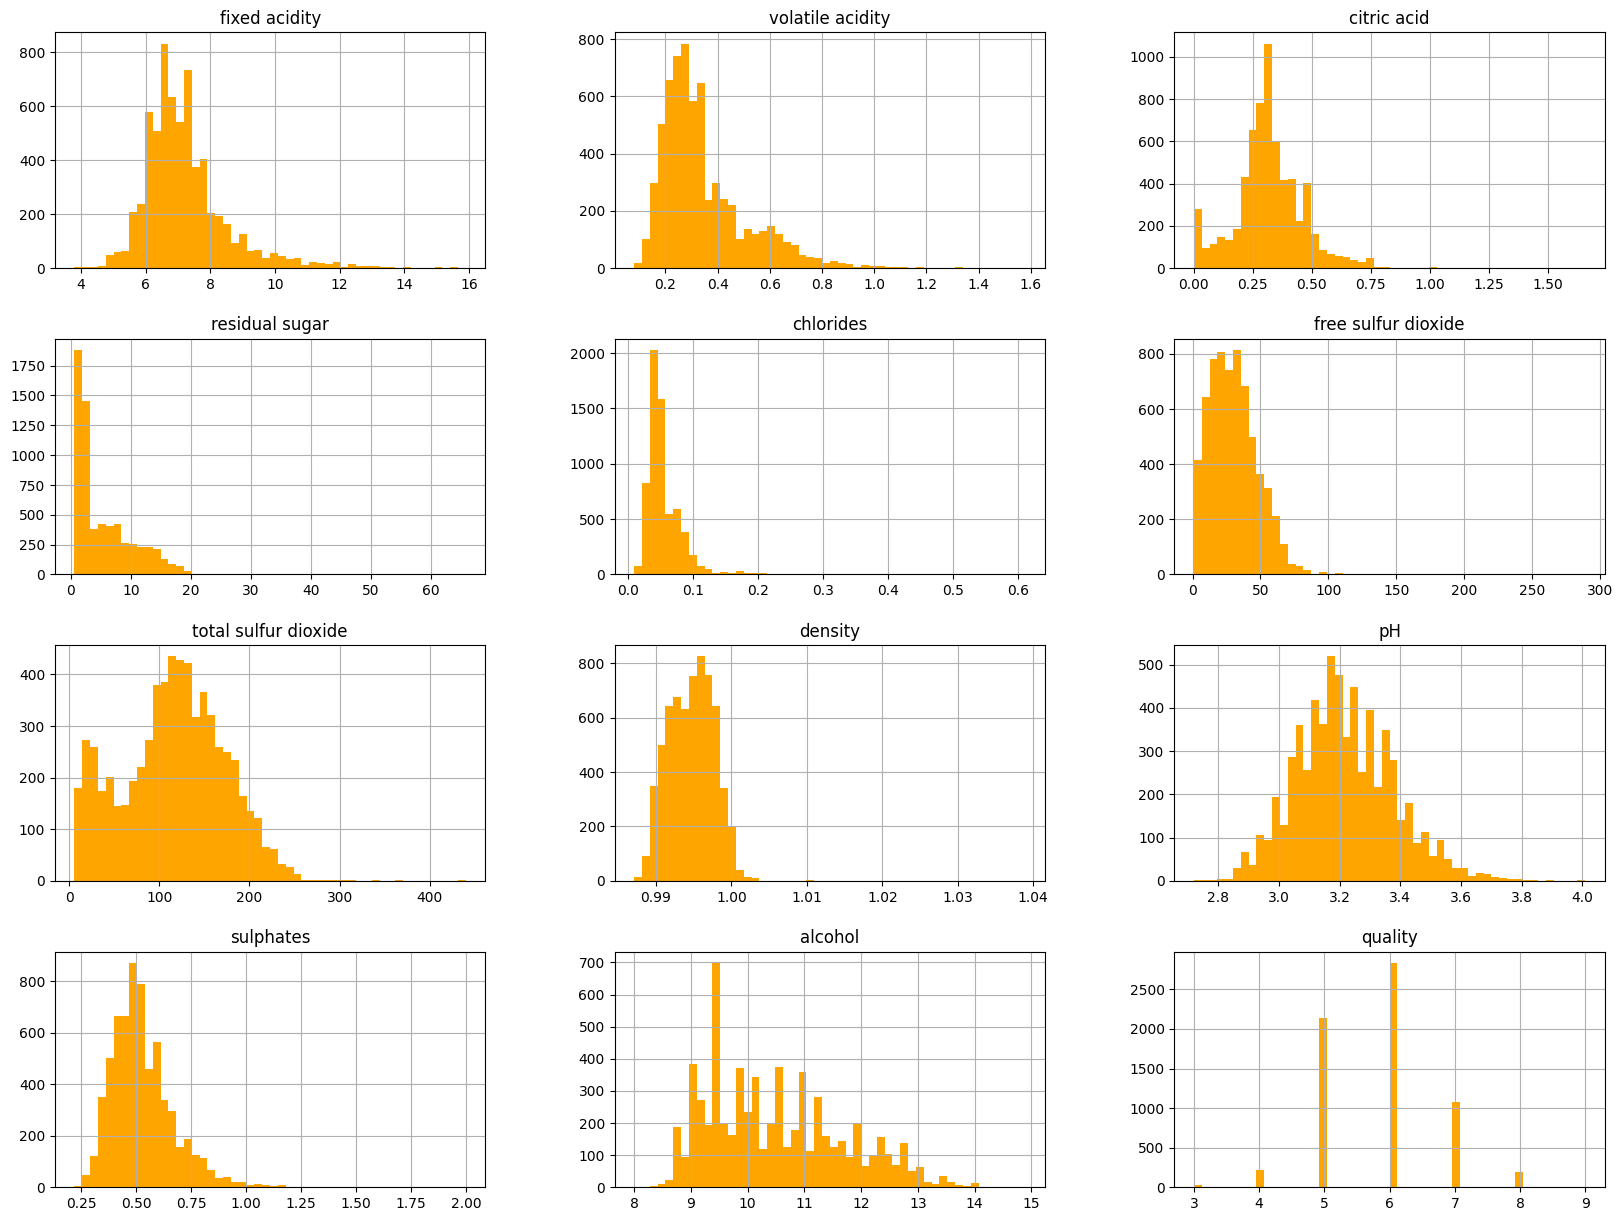

In [9]:
import matplotlib.pyplot as plt 

wines.hist(bins=50, figsize=(20,15), color = "orange")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [13]:
X = wines.drop(['quality'], axis=1)
y = wines['quality']

In [14]:
X = wines.drop(['type'], axis=1)

In [19]:
X.dropna(axis=1,inplace=True)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5196, 12)
(1300, 12)
(5196,)
(1300,)


In [21]:
from sklearn.linear_model import ElasticNet

In [22]:
lr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
lr.fit(X_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [24]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)

    return rmse, mae, r2

In [25]:
predicted_value = lr.predict(X_test)

In [26]:
(rmse, mae, r2) = eval_metrics(y_test, predicted_value)

In [27]:
print("rmse = ", rmse)
print("mae = ", mae)
print("r2 = ", r2)

rmse =  0.10382861513763887
mae =  0.08194103236749226
r2 =  0.9850076699164458
